In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv("Churn_Modelling.csv")
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [39]:
# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [40]:
x = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.2, random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [41]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

print(tensorflow.__version__)
print(keras.__version__)

2.18.0
3.8.0


In [42]:
model  = Sequential()
model.add(Dense(3, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu')) # LEADS TO OVERFITTING
model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 11)                  │              44 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92 (368.00 B)

 Trainable params: 92 (368.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
history = model.fit(x_train_scaled, y_train, epochs=100 , steps_per_epoch=250, validation_split=0.2)


Epoch 1/100
224/250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8224 - loss: 1.6187

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8217 - loss: 1.6074 - val_accuracy: 0.7925 - val_loss: 1.6917
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8232 - loss: 1.2531 - val_accuracy: 0.8025 - val_loss: 1.7073
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8218 - loss: 1.1776 - val_accuracy: 0.7925 - val_loss: 1.0522
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8099 - loss: 0.6189 - val_accuracy: 0.7750 - val_loss: 0.5413
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7944 - loss: 0.5200 - val_accuracy: 0.7925 - val_loss: 0.5377
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8280 - loss: 0.4902 - val_accuracy: 0.7975 - val_loss: 0.5506
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8188 - loss: 0.4702 - val_accuracy: 0.7975 - val_loss: 0.5072
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8258 - loss: 0.4666 - val_accuracy: 0.800

In [46]:
model.layers[0].get_weights()

[array([[ 0.22937511, -0.0788994 , -0.45562702],
        [-0.8569923 ,  0.3622114 , -0.86417705],
        [-0.35507968,  0.06689394,  0.40138647],
        [-0.05799462,  0.4387155 ,  0.11017701],
        [-0.11448101,  0.15229344, -0.2565202 ],
        [-0.3400174 ,  0.17639144,  0.12397981],
        [ 0.6210264 , -0.65145105, -0.39783898],
        [ 0.22393917, -0.08210566, -0.29775468],
        [-0.27241194,  0.28041857, -0.11028678],
        [ 0.15486391, -0.23307912, -0.31018165],
        [ 0.3476019 , -0.24185544, -0.32415506]], dtype=float32),
 array([-0.07840116,  0.15994394, -0.20953171], dtype=float32)]

In [47]:
y_log = model.predict(x_test_scaled)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.809375

In [50]:
import matplotlib.pyplot as plt
print(history.history)

{'accuracy': [0.815625011920929, 0.8212500214576721, 0.8137500286102295, 0.7912499904632568, 0.800000011920929, 0.8125, 0.8187500238418579, 0.8193749785423279, 0.8193749785423279, 0.8181250095367432, 0.8187500238418579, 0.8187500238418579, 0.8181250095367432, 0.8193749785423279, 0.8206250071525574, 0.8212500214576721, 0.8212500214576721, 0.8218749761581421, 0.8218749761581421, 0.8187500238418579, 0.8206250071525574, 0.8218749761581421, 0.8224999904632568, 0.8206250071525574, 0.8174999952316284, 0.8199999928474426, 0.8237500190734863, 0.8162500262260437, 0.8218749761581421, 0.8212500214576721, 0.8199999928474426, 0.8193749785423279, 0.8193749785423279, 0.8187500238418579, 0.8206250071525574, 0.8206250071525574, 0.8206250071525574, 0.8187500238418579, 0.8174999952316284, 0.8187500238418579, 0.8256250023841858, 0.8231250047683716, 0.8237500190734863, 0.8199999928474426, 0.8206250071525574, 0.8237500190734863, 0.8206250071525574, 0.8218749761581421, 0.8168749809265137, 0.8218749761581421, 

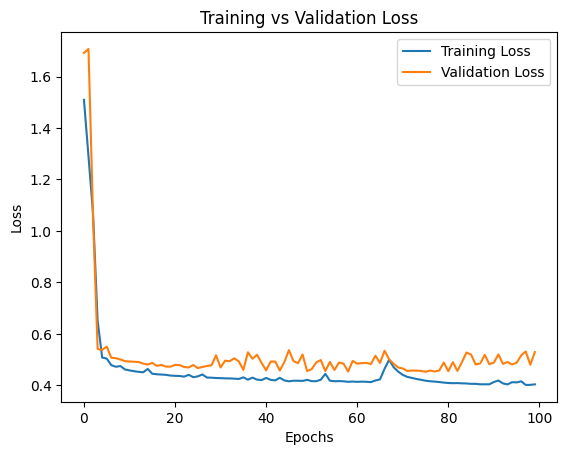

In [51]:
# Plot Loss vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

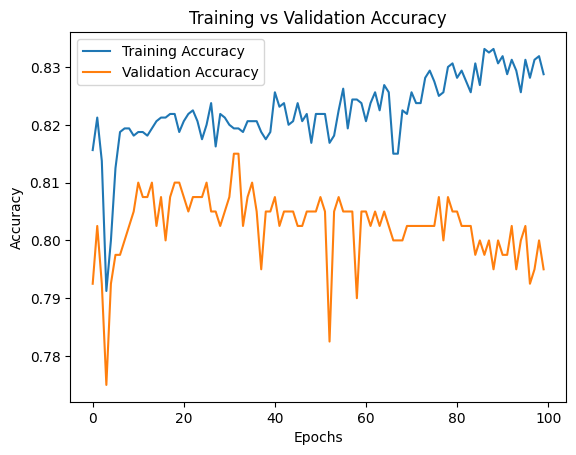

In [52]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()